# Warm-up excercises week 6

Now that you have seen how to communicate with basic APIs, it's time for you to combine apply this knowledge. To prepare for the tutorial, we ask you to complete two warm-up excercises.


Some important notes for the excercises:

* These excercises are a warming up meant to help you get ready for class. Make sure to give them a try on all of them. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next excercise (but make sure to hand it in).
* While we of course like when you get all the answers right, the important thing is to exercise and apply the knowledge. So we will still accept solutions that may not be complete, as long as we see enough effort for each excercise. 
* Delivering the warm-up excercises on time is critical, as it helps also prepare for the tutorial session.
* As these excercises are meant to help you participate in the tutorial and us to make sure you can get as much as possible from the tutorials, we do not expect perfect answers. However, this is important to show the effort you have put in the excercises and what obstacles you faced.

In [4]:
import requests # needed to interact with APIs
import json
import pandas as pd

In [2]:
requests?

Type:        module
String form: <module 'requests' from '/Users/marieke/Library/Python/3.8/lib/python/site-packages/requests/__init__.py'>
File:        ~/Library/Python/3.8/lib/python/site-packages/requests/__init__.py
Docstring:  
Requests HTTP Library
~~~~~~~~~~~~~~~~~~~~~

Requests is an HTTP library, written in Python, for human beings.
Basic GET usage:

   >>> import requests
   >>> r = requests.get('https://www.python.org')
   >>> r.status_code
   200
   >>> b'Python is a programming language' in r.content
   True

... or POST:

   >>> payload = dict(key1='value1', key2='value2')
   >>> r = requests.post('https://httpbin.org/post', data=payload)
   >>> print(r.text)
   {
     ...
     "form": {
       "key1": "value1",
       "key2": "value2"
     },
     ...
   }

The other HTTP methods are supported - see `requests.api`. Full documentation
is at <https://requests.readthedocs.io>.

:copyright: (c) 2017 by Kenneth Reitz.
:license: Apache 2.0, see LICENSE for more details.


# Excercise 1

1. During the lecture, we broke down our interaction with the datamuse API. The documentation for this API is available here https://www.datamuse.com/api/. Use another operation discussed in class  offered by this API apart from the ones we interacted with in the lecture. 
2. Explain the meaning of the http response code you received. 
3. Some of the endpoint return values which allow you to subset your data. For instance, rel_rhy return the rhyming word, as well as it's "rhyming score". We could use the rhyming score to create a dataframe with only the most "strongly rhyming words". Get a part of your data (API response) into a dataframe based on criteria of your choosing.

In [3]:
# Choose suggestions (sug) as endpoint
parameter = {"s":"comp"} # string I want to find suggestions for is "comp"
r = requests.get('https://api.datamuse.com/sug', parameter)

In [10]:
# alternatively:
r = requests.get('https://api.datamuse.com/sug?s=comp')
r.json()

[{'word': 'company', 'score': 4152},
 {'word': 'complement', 'score': 3601},
 {'word': 'complex', 'score': 3513},
 {'word': 'compromise', 'score': 3318},
 {'word': 'compound', 'score': 3108},
 {'word': 'comprehensive', 'score': 3060},
 {'word': 'comprise', 'score': 2987},
 {'word': 'compliment', 'score': 2718},
 {'word': 'computer', 'score': 2584},
 {'word': 'complicit', 'score': 2552}]

In [4]:
# This worked, response code 200 = OK!
r

<Response [200]>

In [5]:
# why is computational not a suggestion!!
r.json()

[{'word': 'company', 'score': 4152},
 {'word': 'complement', 'score': 3601},
 {'word': 'complex', 'score': 3513},
 {'word': 'compromise', 'score': 3318},
 {'word': 'compound', 'score': 3108},
 {'word': 'comprehensive', 'score': 3060},
 {'word': 'comprise', 'score': 2987},
 {'word': 'compliment', 'score': 2718},
 {'word': 'computer', 'score': 2584},
 {'word': 'complicit', 'score': 2552}]

In [6]:
# Choose words as endpoint and specify multiple parameters
# words associated with "student", return max 10, return meta data (definition and Part of Speech tag)
parameter = {"rel_trg":"student", "max":10, "md":"p d"} 
r = requests.get('https://api.datamuse.com/words', parameter)
r # all went well

<Response [200]>

In [ ]:
# this makes the string: 'https://api.datamuse.com/words?rel_trg=student&max=10&md=p%20%d'

In [7]:
r.json()

[{'word': 'enrollment',
  'score': 1347,
  'tags': ['n'],
  'defs': ['n\tthe act of enrolling',
   'n\tthe body of people (such as students) who register or enroll at the same time']},
 {'word': 'tuition',
  'score': 1321,
  'tags': ['n'],
  'defs': ['n\ta fee paid for instruction (especially for higher education)',
   'n\tteaching pupils individually (usually by a tutor hired privately)']},
 {'word': 'ratio',
  'score': 1319,
  'tags': ['n'],
  'defs': ['n\tthe relative magnitudes of two quantities (usually expressed as a quotient)']},
 {'word': 'achievement',
  'score': 1310,
  'tags': ['n'],
  'defs': ['n\tthe action of accomplishing something']},
 {'word': 'math',
  'score': 1306,
  'tags': ['n'],
  'defs': ['n\ta science (or group of related sciences) dealing with the logic of quantity and shape and arrangement']},
 {'word': 'eligible',
  'score': 1292,
  'tags': ['adj'],
  'defs': ['adj\tprohibited by official rules',
   'adj\tqualified for or allowed or worthy of being chosen']}

In [8]:
# "strongly rhyming words"
parameter = {"rel_rhy":"computer"}
request = requests.get('https://api.datamuse.com/words',parameter)
df = pd.json_normalize(request.json())
print(df.shape)
df.head()

(43, 3)


word  score  numSyllables
0    tutor    956             2
1   neuter    850             2
2   router    688             2
3   pewter    656             2
4  shooter    604             2

In [9]:
# only keep rows with an above average ryhming score
df_high = df[df.score > df.score.mean()]
df_high.shape

(14, 3)

In [10]:
df.score.mean()

235.04651162790697

In [11]:
df_high

word  score  numSyllables
0          tutor    956             2
1         neuter    850             2
2         router    688             2
3         pewter    656             2
4        shooter    604             2
5     prosecutor    580             4
6         suitor    564             2
7        scooter    546             2
8         hooter    519             2
9       commuter    460             3
10     recruiter    269             3
11  minicomputer    252             5
12         cuter    240             2
13  sharpshooter    239             3

# Excercise 2

1. Use the API snippet from The Guardian provided in the lecture, and the documentation available here https://open-platform.theguardian.com/documentation/, to create a custom query from the Guardian of your choosing. To complete this excercise, your custom query must return at least 20 rows of data. Use the API credential (key) provided in the function in the lecture notebook. If you receive an error regarding a conflciting query occuring at the same time, try to run the snippet again until you establish a succesful connection with the API/get a succesful response. 
2. Conduct a basic exploratory analysis to explore what columns the dataset has, how many articles you retreived, and in what sections of the website they were published. 
3. Play around with the webPublicationDate column which shows when the articles from your query were published. The column is NOT datetime and needs to be. Transform to datetime to visualise or otherwise informatively count the number of articles published on a particular date. 

In [12]:
# original one from lecture notebook
def query_api(tag, from_date, page, api_key):
    """
    Function to query the API for a particular tag
    returns: a response from API
    """
    response = requests.get("https://content.guardianapis.com/search?tag="
                            + tag + "&from-date=" + from_date 
                            +"&page=" + str(page) + "&page-size=200&api-key=" + api_key)
    return response

In [11]:
# adapted to choose the content endpoint
def query_api2(query, from_date, page, api_key):
    """
    Function to query the API for a particular tag
    returns: a response from API
    """
    response = requests.get("https://content.guardianapis.com/search?q=" # note the change here
                            + query + "&from-date=" + from_date 
                            +"&page=" + str(page) + "&page-size=200&api-key=" + api_key)
    return response

In [12]:
response = query_api2('climate', '2022-01-01', '1', 'e723ffce-dfd5-427e-b9b8-779f5efedb02')
response # all went well

<Response [200]>

In [13]:
response.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1314,
  'startIndex': 1,
  'pageSize': 200,
  'currentPage': 1,
  'pages': 7,
  'orderBy': 'relevance',
  'results': [{'id': 'news/2022/jan/04/weatherwatch-andorra-continental-alpine-climate',
    'type': 'article',
    'sectionId': 'news',
    'sectionName': 'News',
    'webPublicationDate': '2022-01-04T06:00:09Z',
    'webTitle': 'Weatherwatch: Andorra’s continental and alpine climate',
    'webUrl': 'https://www.theguardian.com/news/2022/jan/04/weatherwatch-andorra-continental-alpine-climate',
    'apiUrl': 'https://content.guardianapis.com/news/2022/jan/04/weatherwatch-andorra-continental-alpine-climate',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'news/2022/mar/01/weatherwatch-many-climate-zones-chile',
    'type': 'article',
    'sectionId': 'news',
    'sectionName': 'News',
    'webPublicationDate': '2022-03-01T06:00:13Z',
    'webTitle': 'Weatherwatch: the many c

This is the same: https://content.guardianapis.com/search?q=climate&from-date=2022-01-01&page=1&page-size=200&api-key=e723ffce-dfd5-427e-b9b8-779f5efedb02

In [15]:
df = pd.json_normalize(response.json()['response']['results'])
df.head()

id     type    sectionId  \
0  news/2022/jan/04/weatherwatch-andorra-continen...  article         news   
1  news/2022/mar/01/weatherwatch-many-climate-zon...  article         news   
2  environment/2022/mar/10/climate-change-fundame...  article  environment   
3  us-news/2022/feb/12/trump-judge-biden-climate-...  article      us-news   
4  environment/2022/feb/10/climate-activists-buy-...  article  environment   

   sectionName    webPublicationDate  \
0         News  2022-01-04T06:00:09Z   
1         News  2022-03-01T06:00:13Z   
2  Environment  2022-03-10T10:22:43Z   
3      US news  2022-02-12T14:54:44Z   
4  Environment  2022-02-10T13:26:46Z   

                                            webTitle  \
0  Weatherwatch: Andorra’s continental and alpine...   
1      Weatherwatch: the many climate zones of Chile   
2  Climate change fundamentally affecting Europea...   
3   Trump-appointed judge blocks Biden administra...   
4  Climate activists buy environment secretary’s ...   

                                              webUrl  \
0  https://www.theguardian.com/news/2022/jan/04/w...   
1  https://www.theguardian.com/news/2022/mar/01/w...   
2  https://www.theguardian.com/environment/2022/m...   
3  https://www.theguardian.com/us-news/2022/feb/1...   
4  https://www.theguardian.com/environment/2022/f...   

                                              apiUrl  isHosted     pillarId  \
0  https://content.guardianapis.com/news/2022/jan...     False  pillar/news   
1  https://content.guardianapis.com/news/2022/mar...     False  pillar/news   
2  https://content.guardianapis.com/environment/2...     False  pillar/news   
3  https://content.guardianapis.com/us-news/2022/...     False  pillar/news   
4  https://content.guardianapis.com/environment/2...     False  pillar/news   

  pillarName  
0       News  
1       News  
2       News  
3       News  
4       News

In [16]:
# what columns are returned?
df.columns

Index(['id', 'type', 'sectionId', 'sectionName', 'webPublicationDate',
       'webTitle', 'webUrl', 'apiUrl', 'isHosted', 'pillarId', 'pillarName'],
      dtype='object')

In [17]:
# how many articles/rows are there?
len(df)

200

In [18]:
# in which sections of the Guardian are they published?
df['sectionId'].value_counts()

environment                   84
commentisfree                 22
australia-news                18
us-news                        8
world                          8
global-development             7
uk-news                        6
society                        6
business                       6
news                           5
lifeandstyle                   4
science                        4
politics                       4
books                          3
film                           2
culture                        2
artanddesign                   2
education                      2
travel                         2
tv-and-radio                   1
reimagining-sustainability     1
law                            1
fashion                        1
sport                          1
Name: sectionId, dtype: int64

In [19]:
# data types of my columns
df.dtypes

id                    object
type                  object
sectionId             object
sectionName           object
webPublicationDate    object
webTitle              object
webUrl                object
apiUrl                object
isHosted                bool
pillarId              object
pillarName            object
dtype: object

In [20]:
df.head()

id     type    sectionId  \
0  news/2022/jan/04/weatherwatch-andorra-continen...  article         news   
1  news/2022/mar/01/weatherwatch-many-climate-zon...  article         news   
2  environment/2022/mar/10/climate-change-fundame...  article  environment   
3  us-news/2022/feb/12/trump-judge-biden-climate-...  article      us-news   
4  environment/2022/feb/10/climate-activists-buy-...  article  environment   

   sectionName    webPublicationDate  \
0         News  2022-01-04T06:00:09Z   
1         News  2022-03-01T06:00:13Z   
2  Environment  2022-03-10T10:22:43Z   
3      US news  2022-02-12T14:54:44Z   
4  Environment  2022-02-10T13:26:46Z   

                                            webTitle  \
0  Weatherwatch: Andorra’s continental and alpine...   
1      Weatherwatch: the many climate zones of Chile   
2  Climate change fundamentally affecting Europea...   
3   Trump-appointed judge blocks Biden administra...   
4  Climate activists buy environment secretary’s ...   

                                              webUrl  \
0  https://www.theguardian.com/news/2022/jan/04/w...   
1  https://www.theguardian.com/news/2022/mar/01/w...   
2  https://www.theguardian.com/environment/2022/m...   
3  https://www.theguardian.com/us-news/2022/feb/1...   
4  https://www.theguardian.com/environment/2022/f...   

                                              apiUrl  isHosted     pillarId  \
0  https://content.guardianapis.com/news/2022/jan...     False  pillar/news   
1  https://content.guardianapis.com/news/2022/mar...     False  pillar/news   
2  https://content.guardianapis.com/environment/2...     False  pillar/news   
3  https://content.guardianapis.com/us-news/2022/...     False  pillar/news   
4  https://content.guardianapis.com/environment/2...     False  pillar/news   

  pillarName  
0       News  
1       News  
2       News  
3       News  
4       News

In [21]:
# make new column in datetime format
df['date'] = pd.to_datetime(df['webPublicationDate'])
df.dtypes

id                                 object
type                               object
sectionId                          object
sectionName                        object
webPublicationDate                 object
webTitle                           object
webUrl                             object
apiUrl                             object
isHosted                             bool
pillarId                           object
pillarName                         object
date                  datetime64[ns, UTC]
dtype: object

In [22]:
# how many per day
df.groupby(df['date'].dt.date).size()

date
2022-01-01    1
2022-01-02    2
2022-01-03    1
2022-01-04    2
2022-01-06    2
             ..
2022-03-12    4
2022-03-13    4
2022-03-14    4
2022-03-15    6
2022-03-16    2
Length: 63, dtype: int64

<AxesSubplot:xlabel='date'>

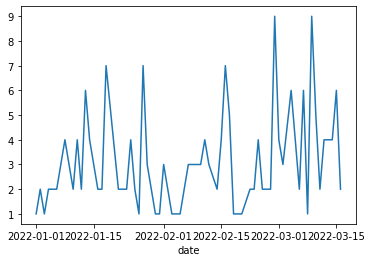

In [23]:
# visualize over time per day
df.groupby(df['date'].dt.date).size().plot()
# select only the date (not time) from the datetime column, calculate how many (size) and plot

In [24]:
# Alternative (worse!) approach: remove time from the string
df['date_str'] = df['webPublicationDate'].str[0:10] # we know that the first 10 characters is the date.
df[['webPublicationDate', 'date_str']].head()

webPublicationDate    date_str
0  2022-01-04T06:00:09Z  2022-01-04
1  2022-03-01T06:00:13Z  2022-03-01
2  2022-03-10T10:22:43Z  2022-03-10
3  2022-02-12T14:54:44Z  2022-02-12
4  2022-02-10T13:26:46Z  2022-02-10

In [25]:
df.groupby(df['date_str']).size()

date_str
2022-01-01    1
2022-01-02    2
2022-01-03    1
2022-01-04    2
2022-01-06    2
             ..
2022-03-12    4
2022-03-13    4
2022-03-14    4
2022-03-15    6
2022-03-16    2
Length: 63, dtype: int64

### EXTRA: What if I want the first 5 pages? Let's create a for loop

In [26]:
resp = []
for p in range(1,6):
    print(p)
    response = query_api2('climate', '2022-01-01', p, 'e723ffce-dfd5-427e-b9b8-779f5efedb02')
    resp.extend(response.json()['response']['results']) # extending(!) the list (= one big list) instead of appending (= list of lists)

1
2
3
4
5


In [27]:
# now we have way more
len(resp)

1000

In [28]:
# this is how the first 3 look like
resp[0:3]

[{'id': 'news/2022/jan/04/weatherwatch-andorra-continental-alpine-climate',
  'type': 'article',
  'sectionId': 'news',
  'sectionName': 'News',
  'webPublicationDate': '2022-01-04T06:00:09Z',
  'webTitle': 'Weatherwatch: Andorra’s continental and alpine climate',
  'webUrl': 'https://www.theguardian.com/news/2022/jan/04/weatherwatch-andorra-continental-alpine-climate',
  'apiUrl': 'https://content.guardianapis.com/news/2022/jan/04/weatherwatch-andorra-continental-alpine-climate',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'news/2022/mar/01/weatherwatch-many-climate-zones-chile',
  'type': 'article',
  'sectionId': 'news',
  'sectionName': 'News',
  'webPublicationDate': '2022-03-01T06:00:13Z',
  'webTitle': 'Weatherwatch: the many climate zones of Chile',
  'webUrl': 'https://www.theguardian.com/news/2022/mar/01/weatherwatch-many-climate-zones-chile',
  'apiUrl': 'https://content.guardianapis.com/news/2022/mar/01/weatherwatch-many-climate-zones-

In [29]:
# convert to dataframe
df_more = pd.json_normalize(resp)
len(df_more)

1000

In [30]:
df_more.head()

id     type    sectionId  \
0  news/2022/jan/04/weatherwatch-andorra-continen...  article         news   
1  news/2022/mar/01/weatherwatch-many-climate-zon...  article         news   
2  environment/2022/mar/10/climate-change-fundame...  article  environment   
3  us-news/2022/feb/12/trump-judge-biden-climate-...  article      us-news   
4  environment/2022/feb/10/climate-activists-buy-...  article  environment   

   sectionName    webPublicationDate  \
0         News  2022-01-04T06:00:09Z   
1         News  2022-03-01T06:00:13Z   
2  Environment  2022-03-10T10:22:43Z   
3      US news  2022-02-12T14:54:44Z   
4  Environment  2022-02-10T13:26:46Z   

                                            webTitle  \
0  Weatherwatch: Andorra’s continental and alpine...   
1      Weatherwatch: the many climate zones of Chile   
2  Climate change fundamentally affecting Europea...   
3   Trump-appointed judge blocks Biden administra...   
4  Climate activists buy environment secretary’s ...   

                                              webUrl  \
0  https://www.theguardian.com/news/2022/jan/04/w...   
1  https://www.theguardian.com/news/2022/mar/01/w...   
2  https://www.theguardian.com/environment/2022/m...   
3  https://www.theguardian.com/us-news/2022/feb/1...   
4  https://www.theguardian.com/environment/2022/f...   

                                              apiUrl  isHosted     pillarId  \
0  https://content.guardianapis.com/news/2022/jan...     False  pillar/news   
1  https://content.guardianapis.com/news/2022/mar...     False  pillar/news   
2  https://content.guardianapis.com/environment/2...     False  pillar/news   
3  https://content.guardianapis.com/us-news/2022/...     False  pillar/news   
4  https://content.guardianapis.com/environment/2...     False  pillar/news   

  pillarName  
0       News  
1       News  
2       News  
3       News  
4       News